## Hidepy
Python library for hiding data by inserting the data into an image using LSB-Stenography.

### Imports

In [45]:
import math
import numpy as np

### Process Data

#### Encode Data to 8 bit int array
The 8 bit array stores data in the least significant bit (LSB), meaning any other bits are not used.
This is for simplicity but for larger amounts of data hiding, this could be very slow. 
__May want to use bitarray lib if too slow__

#### 8-bit in array => bitArray

In [46]:
# takes string, and returns array of ints
def encodeString(string, length):
    arr = np.zeros((length,), dtype="int8")
    arr[0:len(string)] = [ord(char) for char in string]
    return arr

# we get a simulated bit array by using a int array
# return array of 1 or 0 [arr[0][0], arr[0][]]
def toBitArray(arr):
    message_num = arr

    length = len(arr);   # max length of message

    bits = np.zeros(length*8,dtype="int8") # allow bits to hold length of bytes, but also to be divided into 3 for RGB 

    for i in range(length): # loop through char of message
        integer = 0
        if i<len(message):
            integer = ord(message[i])
        bits[i*8]= ((integer)&1)
        integer = integer>>1
        bits[i*8+1]= (integer&1)
        integer = integer>>1
        bits[i*8+2]= (integer&1)
        integer = integer>>1
        bits[i*8+3]= (integer&1)
        integer = integer>>1
        bits[i*8+4]= (integer&1)
        integer = integer>>1
        bits[i*8+5]= (integer&1)
        integer = integer>>1
        bits[i*8+6]= (integer&1)
        integer = integer>>1
        bits[i*8+7]= (integer&1)
    return bits

#### Decode Data

In [47]:
# Takes array of ints and returns string
def decodeString(array, length):
    string = ''.join([chr(integer) for integer in array])
    string = ''.join([string,(chr(0)*(len(array)-length))])
    return string

# bit array to integer array
def fromBitArray(b):
    length = int(len(b)/8);   # max length of message

    ints = np.zeros(length,dtype="int8") # allow bits to hold length of bytes, but also to be divided into 3 for RGB 

    for i in range(length): # loop through char of message
        ints[i]=((b[0+i*8]<<0)+
                (b[1+i*8]<<1)+
                (b[2+i*8]<<2)+
                (b[3+i*8]<<3)+
                (b[4+i*8]<<4)+
                (b[5+i*8]<<5)+
                (b[6+i*8]<<6)+
                (b[7+i*8]<<7))
    return ints 

### Image Processing

#### Encode data to image
    

In [48]:
# returns data from LSB of image in left to right pixel and pixel channels
def extractData(image, row, col, length):
    extractedData = np.zeros(length*8, dtype="int8")
    for i in range(8*length):
        extractedData[i]=1&image[row,col+int(i/3), i%3]
        
    return extractedData

def insertData(image, data, row, col, length):
    for i in range(len(data)):
        image[row,col+int(i/3), i%3]=1&data[i]
        
    return image

#### Extract data from image
# takes image and row and column of starting point and length of data
# return extracted image

In [49]:
# returns data from LSB of image in left to right pixel and pixel channels
def extractData(image, row, col, length):
    extractedData = np.zeros(length*8, dtype="int8")
    for i in range(8*length):
        extractedData[i]=1&image[row,col+int(i/3), i%3]
        
    return extractedData

    
# p[ i, j, c]... with p = pixel, i = row, j=starting column, c=channel (0=r, 1=g, 2=b), n=length
# return [[i, j, 0], [i, j, 1], [i, j, 2], [i, j+1, 0], [i, j+1, 1], [i, j+1, 2]... [i, j+ceiling(n/3), 2]]
def extractImage(image, row, col, dataLength):
    return image[row:row+1, col: col + math.ceil(length/3), :]

### Main
Example of using the library

In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

### Tests

#### Encode and Decode Data

In [51]:
## Test encode data and then decoding the data
message = "hello world"

encodedString = encodeString(message, 19)
decodedString = decodeString(encodedString, 19)

print("TEST (message equal decodedMessage with '\\x00' removed):\n ",decodedString.replace(chr(0),'') == message)

TEST (message equal decodedMessage with '\x00' removed):
  True


#### Insert encoded and extract decoded Data from Image

#### Target Image
Image for hiding data  
<img src="/image.jpeg" width="200px"></img>

In [52]:
#Import image
image = cv2.imread("image.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert image to RGB

# Data to hide
message = "hello world"
messageLength = 15

# Encode data
encodedString = encodeString(message, messageLength)
dataB = toBitArray(encodedString)

# Insert encoded data into image
image = insertData(image, dataB, 5,0,messageLength)

# Extract Data
data = extractData(image, 5,0,messageLength)

dataE = fromBitArray(data)

decodeString(dataE, messageLength)

'hello world\x00\x00\x00\x00'

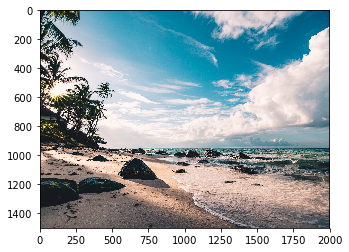

In [53]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()